In [1]:
import pandas as pd

# Forecasting time series of US real estate sales data
In this section it is tried to build a model for predicting prices of real estate sales in the US.
The time series is generated by aggregating data of individual sales. 

## Loading the data and building the time series

In [150]:
def tweak_sales(df_):
    """Function convert dates to datetime-objects and pushes them into the index.
    Then, time series for prices of real estate on quarterly basis are build by grouping and aggregation."""
    return(df_.assign(date=lambda s: s.datesold.astype('datetime64[ns]'))
           .set_index('date')
           .drop(['datesold', 'postcode'], axis='columns')           
           .groupby(by=['bedrooms'])
           .resample('Q')
           .price
           .median()
           .swaplevel()
           .unstack()
           )

    
df_raw = pd.read_csv('raw_sales.csv')

<Axes: xlabel='date'>

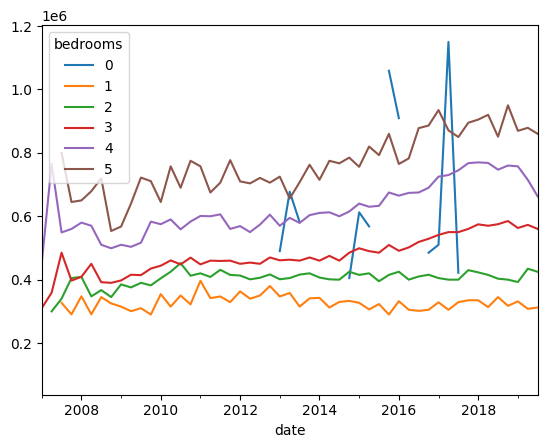

In [151]:
tweak_sales(df_raw).plot()

In [19]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
